**ФИО:** Иванов Андрей Александрович

**Факт о себе:** хочу найти стажировку на аналитика

**Бонус (1 балл):**  Прикрепите фотографию того, как вы начали этот февраль. Какую самую классную эмоцию вы испытали за прошедший месяц?

![Играю в футбол в вышке](https://sun9-27.userapi.com/impg/FZ9wokLRgAUKWnj4t98hHgwH0K4p31GoeAyYXw/CTXk-A8isKw.jpg?size=2560x1703&quality=95&sign=cb870c4fab72fef3777dd103f1508bbd&type=album)
    
Самая классная эмоция - я влюбился;)

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1: скучная разминка (25 баллов)

__[5 баллов]__ Создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5. 

- Найдите её след с помощью библиотечных функций. 
- Найдите обратную к ней матрицу.

In [2]:
diagonal_elements = [1, 2, 3, 4, 5]
diagonal_matrix = np.diag(diagonal_elements)

print('След матрицы:', np.trace(diagonal_matrix)) #след матрицы
print('Обратная матрица:')
print(np.linalg.inv(diagonal_matrix)) #обратная матрица


След матрицы: 15
Обратная матрица:
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


__[5 баллов]__ сгенерируйте случайную матрицу $X$ размера $4\times5$

- Найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$.
- Найдите произведение $X^TX$, его определитель и след.

In [3]:
#Думаю, тут тоже надо зафиксировать зерно генератора
np.random.seed(52) #ПЯТЬДЕСЯТ ДВА
X = np.random.rand(4, 5) 
submatrix = X[2:4, 1:3]

print('Минор:', np.linalg.det(submatrix)) #минор

X_1 = X.T @ X
print('Новая матрица:')
print(X_1) #новая матрица
print('Определитель новой матрицы:', np.linalg.det(X_1)) #определитель новой матрицы
print('След новой матрицы:', np.trace(X_1)) #след новой матрицы


Минор: -0.1869198128880037
Новая матрица:
[[1.64637336 0.93365424 1.54474649 1.53883451 1.25694428]
 [0.93365424 1.44610732 1.27381419 0.72964347 1.41403936]
 [1.54474649 1.27381419 2.01746081 1.64296903 1.69515394]
 [1.53883451 0.72964347 1.64296903 1.65390801 1.20929914]
 [1.25694428 1.41403936 1.69515394 1.20929914 1.6100216 ]]
Определитель новой матрицы: 2.749561953366228e-18
След новой матрицы: 8.373871103099482


На паре мы говорили, что использования циклов (и самописных вычислений в целом) в python лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В следующих трёх заданиях нельзя пользоваться циклами вообще, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, напишите собственные тесты со случайными матрицами.

**[5 баллов]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [4]:
def prod_and_sq_sum(A):
    diagonal_elements = np.diagonal(A)
    product = np.prod(diagonal_elements) #произведение диагональных элементов
    sum_of_squares = np.sum(diagonal_elements ** 2) #сумму квадратов диагональных элементов
    return f'Произведение квадратных элементов: {product}, сумма квадратных элементов: {sum_of_squares}'

# Тест
A = np.array([[1, 2, 8],
              [3, 7, 5],
              [6, 4, 9]])
print(prod_and_sq_sum(A)) #должно быть 63, 131

Произведение квадратных элементов: 63, сумма квадратных элементов: 131


**[5 баллов]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k, n)}a_ib_i^T$$

**Суть решения:**

Мы получаем на вход 2 матрицы $m\times n$. Сначала мы обрезаем(если нужно) матрицу до размера $m\times k$. Если мы транспонируем одну из матриц, то она будет $k\times m$

***Как я понял, нам надо посчитать сумму произведения i-ых стобцов А и i-ых строк транспонированой матрицы B. Причина такого assumption - только так не будет проблем с размерностью***

Если же мы будем перемножать столбцы A и B.T, то у нас будет ошибка, так как

Чтобы найти это, нужно найти произведение матриц. Но! Если мы перемножим A и B.T, то получим матрицу $m\times m$. А нам нужно получить матрицу $k\times k$ и взять у нее диагонали (именно на них будут результаты произведения i столбцов и строк) и посчитать их сумму.

In [5]:
def f(A, B, k):
    k = min(k, A.shape[1])
    A = A[:, :k] #k столбцов
    B = B[:, :k] #k столбцов
    B_T = B.T #транспонирую сейчас, чтобы путаницы не было
    return np.sum(A[:, :, np.newaxis] * B_T[np.newaxis, :, :], axis=1) #это чатгпт написал

# Тест
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])
k = 2
print(f(A, B, k)) #должно быть [[25, 16, 7], [76, 49, 22], [127, 82, 37]]

[[ 25  16   7]
 [ 76  49  22]
 [127  82  37]]


**[5 баллов]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [6]:
def get_diag(A, B):
    diag_elements = np.einsum('ij,ji->i', A, B) #узнал про эту функцию из чатгпт 
    return diag_elements

#Тест
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

print(get_diag(A, B)) #должно быть [30 69 90]


[30 69 90]


## Задача 2: про удачу и нашу жизнь (25 баллов)

Задача была вдохновлена [вот этим видео.](https://www.youtube.com/watch?v=3LopI4YeC4I)

Люди часто недооценивают роль случайности в своей жизни. Им кажется, что если они прокачают свои навыки и отдадутся полностью работе, они обязательно достигнут успеха. Люди забывают, что удача тоже важна. Иногда слишком.

Пусть у нас в выборке есть $10000$ кандидатов в космонавты. Из них только $10$ человек пройдут все испытания и приступят к тренировкам. Отбор в космонавты на $95\%$ зависит от навыков кандидата и на $5\%$ от его удачливости. Навыки и удачливость не зависят друг от друга.

__а) [5 баллов]__  Сгенерируйте навык каждого кандидата из равномерного распределения на отрезке $[0; 1]$. По аналогии сгенирируйте удачливость каждого кандидата. Итоговую величину, по которой будет производиться отбор в космонавты, рассчитайте по формуле: 

$$
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
$$

Повторите эту симуляцию $10^4$ раз. Оцените среднее значение удачливости тех, кто стал космонавтом. Постройте гистограмму для распределения удачи среди тех, кто стал космонавтом.

**Hint:** обратите внимание на функцию `np.argpartition`. Она поможет вам сделать код проще. Также обратите внимание, что в пунктах б) и в) нужно переиспользовать результаты симуляций из пункта а). Иначе код будет работать слишком долго.

Среднее значение удачливости тех, кто стал космонавтом: 0.9327421294253067


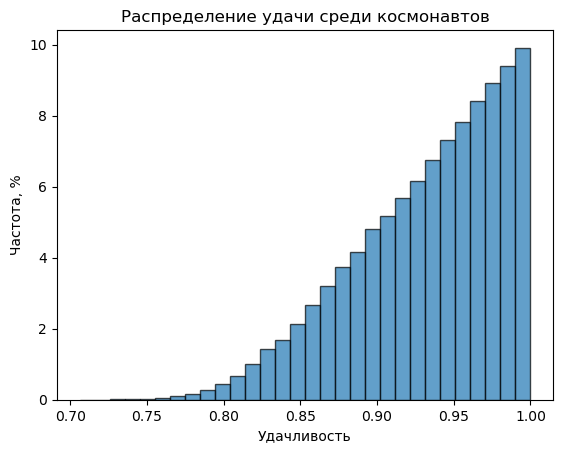

In [7]:
np.random.seed(52) #ДА ЗДРАВСТВУЕТ САНКТ-ПЕТЕРБУРГ
skills = np.random.uniform(0, 1, size=(10000, 10000))
luck = np.random.uniform(0, 1, size=(10000, 10000))
scores = 0.95 * skills + 0.05 * luck
selected_indices = np.argpartition(scores, -10, axis=1)[:, -10:]

lucky_selected = luck[np.arange(len(scores))[:, None], selected_indices]
mean_luck_of_astronauts = np.mean(lucky_selected)

print('Среднее значение удачливости тех, кто стал космонавтом:', mean_luck_of_astronauts)

plt.hist(lucky_selected.flatten(), bins=30, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Удачливость')
plt.ylabel('Частота, %')
plt.title('Распределение удачи среди космонавтов')
plt.show()

Логично, что распределение удаливости возрастает по удачливости, так как оно компенсирует недостаток скилла, и его надо очень много, чтобы выдержать конкуренцию.

__б) [5 баллов]__  Отберите космонавтов по навыкам, `skill`. Оцените с помощью симуляций, на сколько в среднем человек топ кандидатов по `skill` пересекается с топом по `score`.

In [8]:
top_skills_indices = np.argpartition(skills, -10, axis=1)[:, -10:]

print('Среднее пересечение:', np.mean(np.array([len(np.intersect1d(selected_indices[i], top_skills_indices[i])) for i in range(len(scores))])))

Среднее пересечение: 1.8352


__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов? 

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

##### Код работает 50 cекунд в коллабе и 40 на ноуте
Я не придумал, как сделать так, чтобы оно работало быстрее, но надеюсь, это ок, потому что тут много вычислений
Если каждый раз заново сортировать, даже частично, то будет вообще 3 минуты работать

### В условии написано, что график перечения, а до этого писали про отличия топов. Я считал пересечения!

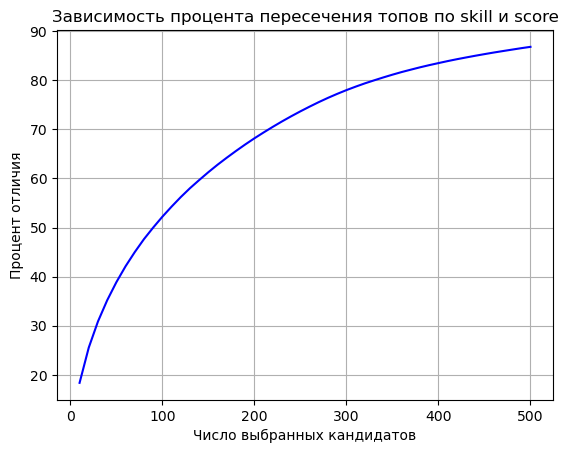

In [9]:
intersections = []
ns = range(10, 501, 10)

sorted_scores = np.argsort(scores, axis=1)[:, ::-1]
sorted_skills = np.argsort(skills, axis=1)[:, ::-1]

for n in ns:
    top_skills = sorted_skills[:, :n]
    top_scores = sorted_scores[:, :n]
    intersection_count = np.mean(np.array([len(np.intersect1d(top_skills[i], top_scores[i])) for i in range(len(scores))]))
    intersection_percent = (intersection_count / n) * 100
    intersections.append(intersection_percent)
    
    
plt.plot(ns, intersections, color='blue')
plt.title("Зависимость процента пересечения топов по skill и score")
plt.xlabel("Число выбранных кандидатов")
plt.ylabel("Процент отличия")
plt.grid(True)
plt.show()  

__г) [5 баллов]__ Сделайте выводы из проделанных рассчётов.

__Ответ:__ Чем больше n, тем больше совпадают топы по score и skill. Это обусловлено тем, что при маленьких n очень большой конкурс, а значит при отборе решают не только скилл, но и удача (особенно когда n = 10 и у нас 1000 человек на 1 место). При росте n у людей с высоким уровнем skill все больше вероятность выиграть конкурс, несмотря на уровень удачи (тем более если она весит 5%). Поэтому более сильные чаще выигрывают место, а значит два топа чаще пересекаются.

> Повод ли это грустить? Конечно же, нет. Если вы попытались схватиться за одну из возможностей и у вас ничего не вышло, забудьте об этом. Не впадайте в депрессию, продолжайте пытаться. В мире есть столько возможностей, которые можно упустить. Обидно будет, если вы не попробуете ещё. Рано или поздно удача вам улыбнётся ❤️❤️❤️

Давайте попробуем понять, когда именно она вам улыбнётся. 

__д) [4 балла]__ Юра хочет стать космонавтом. У него довольно хорошо развиты навыки. Юра входит в $1\%$ лучших, его `score = 0.99` (Юра прокачал свои навыки до 0.99 и вообще не полагается на удачу). С какой вероятностью Юра станет космонавтом?

**Суть решения:** 
У нас есть Юра. Нам надо посчитать, с какой вероятностью он станет космонавтом. Для этого нужно, чтобы он попал в топ-10 среди 10000 человек.

Значит, надо сгенерировать данные по score еще 9999 людей, посмотреть, кто находится на 10 месте среди 9999 людей, и сравнить score 10-го человека с 0.99 (балл Юры), и если score Юры больше, то он станет космонавтом.

И проделаем это 10000 раз, и посчитаем, сколько раз Юра станет космонавтом, и, разделив на количество симуляций, получим искомую вероятность

P.S. мы генерируем $2 \times 9999 \times 10000$ чисел, поэтому код будет работать не очень быстро (примерно 7-8 секунд).

In [10]:
np.random.seed(52) #И ЭТОТ ГОРОД НАШ

luck_2 = np.random.uniform(0, 1, size = (10000, 9999)) 
skills_2 = np.random.uniform(0, 1, size = (10000, 9999)) 
scores_2 = 0.95 * skills_2 + 0.05 * luck_2 
scores_2_inds = np.argpartition(scores_2, 9988, axis=1) #индексы топ-10
scores_2_sorted = np.take_along_axis(scores_2, scores_2_inds, axis=1) #выделяем топ-10
prob_yura = np.sum(np.take(scores_2_sorted, 9989, axis=1) < 0.99) / 10000 #сравниваем 10-го c Юрой

print(prob_yura)

0.3465


__е) [1 балл]__ Юра пытается снова и снова. Сколько в среднем попыток ему надо сделать до первого успеха? 

__Hint:__ тут не нужно ничего симулировать. Надо вспомнить про геометрическое распределение и его математическое ожидание.

In [11]:
#Матожидание геом распределения - это 1/p
print(f'В среднем Юре понадобится {1/prob_yura} попыток.')

В среднем Юре понадобится 2.886002886002886 попыток.


## Задача 3: парадокс лифта (20 баллов)

[Райан Гослинг](https://www.youtube.com/watch?v=2jT71iFvpSM), [Стив Роджерс](https://www.youtube.com/watch?v=hLUdF8cjzyA) и [группа Radiohead](https://www.youtube.com/watch?v=QBGaO89cBMI) катаются на лифте. 

В здании 30 этажей и лобби (нулевой этаж). Лифт только один и работает очень медленно. Он останавливается на каждом этаже по пути наверх, а затем на каждом этаже по пути вниз. Перемещение между этажами и ожидание пассажиров занимает минуту. Если лифт стартует с нулевого этажа в 8 утра, он в 08:30 доезжает до 30 и к 9 утра возвращается на первый этаж.

Проведите $10^4$ экспериментов и с их помощью ответьте на следующие вопросы: 

__а) [5 баллов]__   Райан Гослинг в случайное время подходит к лифту на 3 этаже и ждёт его. Оцените вероятность того, что лифт приедет к Райану сверху. 

In [12]:
#Пусть лифт стартует с нулевого этажа в 0:00 для удобства. По-хорошему, это ни на что не влияет
np.random.seed(52)  #Я КАЖДЫЙ СВОЙ КУПЛЕТ ВАЛЮ КАК НИКОГДА
coming_time_Gosling = np.random.uniform(0, 60, size=10000) 
#тогда, чтобы лифт пришел сверху, надо чтобы coming_time_Gosling было от 3 до 57
prob_Gosling = np.mean(np.logical_and(coming_time_Gosling >= 3, coming_time_Gosling <= 57))
print('Вероятность того, что лифт приедет к Райану сверху:', prob_Gosling)

Вероятность того, что лифт приедет к Райану сверху: 0.9005


__б) [5 баллов]__ Группа Radiohead в случайное время подходит к лифту на 25-ом этаже и ждёт его. Оцените вероятность того, что лифт приедет к группе Radiohead сверху. 

In [13]:
np.random.seed(52)  #АЛЬБОМ ОН ЧИСТО МОЙ НИКОМУ ЕГО НЕ ПРОДАМ
coming_time_Radiohead = np.random.uniform(0, 60, size=10000) 
#тогда, чтобы лифт пришел сверху, надо чтобы coming_time_Radiohead было от 25 до 35
prob_Radiohead = np.mean(np.logical_and(coming_time_Radiohead >= 25, coming_time_Radiohead <= 35))
print('Вероятность того, что лифт приедет к группе Radiohead сверху:', prob_Radiohead)

Вероятность того, что лифт приедет к группе Radiohead сверху: 0.1663


__в) [5 баллов]__  Постройте гистограммы времени ожидания лифта для Райана Гослинга и группы Radiohead. Похожи ли визуально распределения на нормальные? Насколько сильно они отличаются друг от друга?

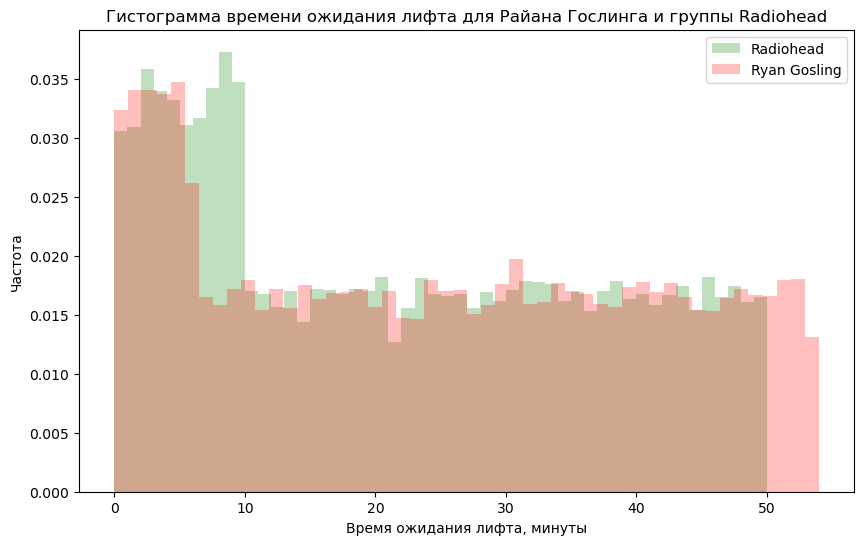

In [14]:
def waiting_time(coming_time, floor):
    if coming_time <= floor:
        return floor - coming_time
    elif floor < coming_time and coming_time < 60 - floor:
        return 60 - floor - coming_time
    else:
        return 60 - coming_time + floor
    
waiting_time_Gosling = np.vectorize(lambda x: waiting_time(x, 3))(coming_time_Gosling)
waiting_time_Radiohead = np.vectorize(lambda x: waiting_time(x, 25))(coming_time_Radiohead)

#plt.figure(figsize=(10, 6))
#plt.hist(waiting_time_Gosling, bins=50, alpha=0.25, color='red', label='Ryan Gosling', density=True)
#plt.xlabel('Время ожидания лифта, минуты')
#plt.ylabel('Частота')
#plt.title('Гистограмма времени ожидания лифта для Райана Гослинга')
#plt.legend()
#plt.show()

plt.figure(figsize=(10, 6))
plt.hist(waiting_time_Radiohead, bins=50, alpha=0.25, color='green', label='Radiohead', density=True)
plt.hist(waiting_time_Gosling, bins=50, alpha=0.25, color='red', label='Ryan Gosling', density=True)
plt.xlabel('Время ожидания лифта, минуты')
plt.ylabel('Частота')
plt.title('Гистограмма времени ожидания лифта для Райана Гослинга и группы Radiohead')
plt.legend()
plt.show()

Это не похоже на нормальное распределение. Гистограммы похожи. У них смещение в сторону небольшого времени ожидание. Оно у них чаще встречается, так как есть 2 способа его получить: когда лифт едет снизу и сверху. Так, на примере Radiohead, у них чаще время до 10 минут, потому что это либо лифт едет с 15-25 этажа, либо же лифт проехал 25 этаж, и он доедет до 30, а потом спустится до 25, и так тоже группа будет ждать лифт до 10 минут.
Отличаются они шириной вершины слева. Она растет с отдалением этажа от наибольшего/наименьшего. А на 15 этаже будет  блидкое к равномерному распределение

__г) [5 баллов]__ У Стива Роджерса куча свободного времени и он катается на лифте весь день. Нарисуйте для Стива два графика: 

- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат отложите оценку вероятности того, что лифт придёт сверху. 
- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат среднее время ожидания лифта.

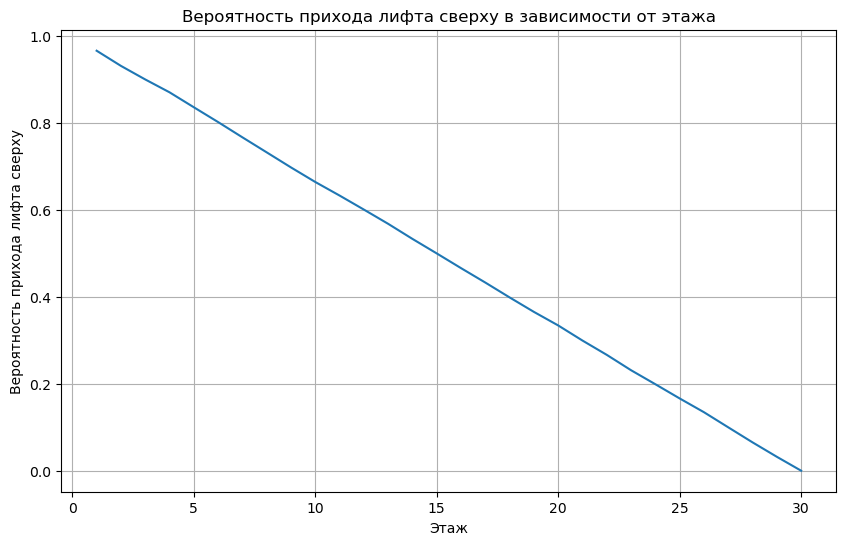

In [15]:
#Первый график
np.random.seed(52)  #НЕ ДУМАЮ О ТОМ КАК ХОРОШО БЫЛО ВЧЕРА
probs_Steve = []
floors = range(1, 31)
coming_time_Steve = np.random.uniform(0, 60, size=10000)

for floor in floors:
    probs_Steve.append(np.mean(np.logical_and(coming_time_Steve >= floor, coming_time_Steve <= 60 - floor)))

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(floors, probs_Steve)
plt.xlabel('Этаж')
plt.ylabel('Вероятность прихода лифта сверху')
plt.title('Вероятность прихода лифта сверху в зависимости от этажа')
plt.grid(True)
plt.show()

Чем более высокий этаж, тем меньше ситуаций, когда лифт приедет сверху, а так как распределение равномерное (по сути), то оно линейно убывает.

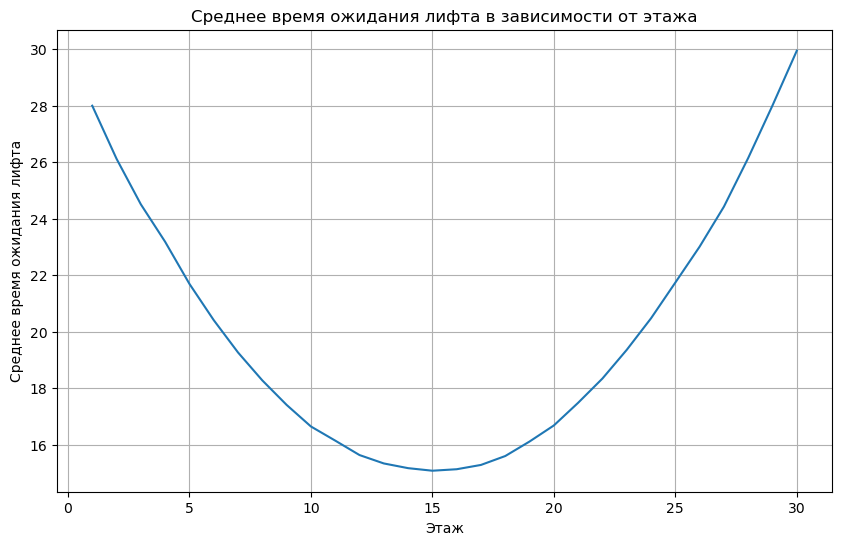

In [16]:
#Второй график
waiting_times_Steve = []

def waiting_time(coming_time, floor):
    if coming_time <= floor:
        return floor - coming_time
    elif floor < coming_time and coming_time < 60 - floor:
        return 60 - floor - coming_time
    else:
        return 60 - coming_time + floor

for floor in floors:
    waiting_times_Steve.append(np.mean(np.vectorize(lambda x: waiting_time(x, floor))(coming_time_Steve)))

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(floors, waiting_times_Steve)
plt.xlabel('Этаж')
plt.ylabel('Среднее время ожидания лифта')
plt.title('Среднее время ожидания лифта в зависимости от этажа')
plt.grid(True)
plt.show()

Чем дальше от центра, тем больше сценариев, когда приходится ждать лифт очень долго, и даже удвоение ситуаций, когда ждать приходится мало, этого недостаточно.

***Как думаете***, будет ли наблюдаться что-то похожее в реальной жизни? Попробуйте понаблюдать за лифтом у себя дома и в офисе. На каком этаже вы живёте/работаете? Выполняется ли для вас [парадокс лифта?](https://en.wikipedia.org/wiki/Elevator_paradox) 

**Ответ:** Не уверен, что будет это выполняться в реальности, потому что в жизни лифт не ездит так, как в задаче. Я живу на 5 этаже, и чаще всего лифт приезжает с первого, то есть снизу (а в задаче должно быть наоборот). Это логично, потому что чаще всего лифту нужно кататься с 1 этажа до того, откуда просят лифт, и обратно.

А еще лифты часто запрограммированы так, что если один человек едет с 1 на 20, а другой хочет поехать с 5 вниз, то лифт не остановится на 5, а доедет до 20, а потом вниз на 5.

В жизни так часто бывает, но у меня так редко выходило. Это сильно зависит от спроса на лифт. Если очень много желающих поехать вниз, то лифт доедет до самого верхнего этажа, где ждет человек, а потом будет по пути вниз собирать всех. Тогда на моем 5 этаже чаще будет лифт приезжать сверху и парадокс лифта будет выполняться.

Но если спрос низкий, то лифт для меня будет ездить по маршруту 1-5-1 этажи, и тогда парадокс лифта не будет выполняться.

## Задача 4: паровозики (30 баллов)

От станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паровозиков -- независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, он снижает свою скорость до скорости догнанного паровозика.

Через достаточно длинный интервал времени паровозики разобьются на несколько групп и далее число групп меняться не будет. Назовём это число групп финальным. Проведите $1000$ симуляций и найдите ответы на следующие вопросы:

__а) [5 баллов]__  Какова вероятность того, что пятый паровозик -- лидер очередной группы?

In [17]:
#пятый должен быть медленнее 4-го, чтобы не догнать его.
np.random.seed(52) #ДА ЗДРАВСТВУЕТ 52
speeds_matrix = np.random.uniform(0, 1, size = (1000, 100))
requirement = speeds_matrix[:, 4] < speeds_matrix[:, 3]
print('Вероятность того, что пятый паровозик -- лидер очередной группы:', np.sum(requirement) / 1000)

Вероятность того, что пятый паровозик -- лидер очередной группы: 0.496


__б) [5 баллов]__ На сколько финальных групп в среднем разбиваются паровозики?

In [18]:
def count_final_groups(speeds):
    groups = []
    for speed in speeds:
        if not groups or speed < groups[-1]:
            groups.append(speed)
    return len(groups)

final_group_counts = np.apply_along_axis(count_final_groups, 1, speeds_matrix)
print(f'В среденем паравозики разбиваются на {np.mean(final_group_counts)} финальных групп')

В среденем паравозики разбиваются на 5.178 финальных групп


__в) [10 баллов]__ Нарисуйте усреднённое по симуляциям количество групп в зависимости от времени от старта. По горизонатльной оси — время, прошедшее от старта. По вертикальной оси — среднее число групп. 

##### Код работает 25-30 секунд

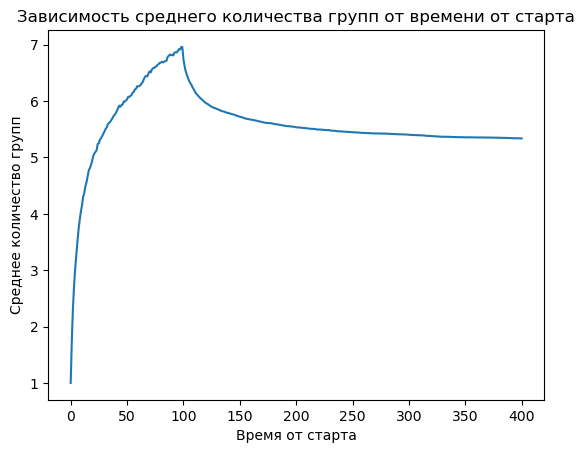

In [19]:
def calculate_distances(speeds, time):
    distances = np.zeros_like(speeds)
    for i in range(len(speeds)):
        distance_covered = max(0, min(speeds[i] * (time - i + 1), distances[i - 1])) if i > 0 else speeds[i] * (time - i + 1)
        distances[i] = distance_covered
    return distances

def count_groups(distances):
    unique_distances = np.unique(distances)
    non_zero_distances = unique_distances[unique_distances != 0]
    return len(non_zero_distances)

mean_group_counts = []

for t in range(0, 401): #400, потому что среднее примерно 380
    group_counts = []
    for speeds in speeds_matrix:
        distances = calculate_distances(speeds, t)
        group_count = count_groups(distances)
        group_counts.append(group_count)
    mean_group_counts.append(np.mean(group_counts))

time_steps = np.arange(0, 401)
plt.plot(time_steps, mean_group_counts)
plt.xlabel('Время от старта')
plt.ylabel('Среднее количество групп')
plt.title('Зависимость среднего количества групп от времени от старта')
plt.show()

Пока все паравозики не выехали, количество групп строго растет со временем, но после оно постепенно убывает, \\ пока не придет к финальному.

__г) [10 баллов]__  Оцените среднее время, в течение которого паровозики разбиваются на финальное число групп. Оцените для этой же случайной величины дисперсию.

Время, в течение которого паровозики разбиваются на финальное число групп, не может быть меньше 99, потому что до этого каждую минуту количество групп будет расти на 1, и тогда это число будет уже не финальным

##### Код работает около 25-35 секунд

In [20]:
final_group_counts = list(np.apply_along_axis(count_final_groups, 1, speeds_matrix))
times = []
for i in range(speeds_matrix.shape[0]):
    t = 99 #минимальное возможное время, когда все паровозики выехали.
    while True:
        group_count = count_groups(calculate_distances(speeds_matrix[i, :], t))
        if group_count == count_final_groups(speeds_matrix[i, :]):
            times.append(t)
            break
        t += 1
        
times = np.array(times)
print('Среднее время:', np.mean(times))
print('Дисперсия:', np.var(times))

Среднее время: 377.529
Дисперсия: 1554688.3851589998
